In [69]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

nbaplayers = pd.read_csv('Cleaned_Capstone_II_Dataset.csv', index_col=0) #Getting rid of the unnamed column

In [70]:
pseason = nbaplayers.sort_values(['Player', 'Season']) #sorting the dataframe by player and season

In [71]:
print(pseason.head()) #inspecting the head of the dataframe

          Player Team  Age  Height(Inches)  Weight(Pounds)       College  \
138   A.C. Green  DAL   33            81.0           225.0  Oregon State   
800   A.C. Green  DAL   34            81.0           225.0  Oregon State   
1054  A.C. Green  DAL   35            81.0           225.0  Oregon State   
1319  A.C. Green  LAL   36            81.0           225.0  Oregon State   
1948  A.C. Green  MIA   37            81.0           225.0  Oregon State   

     Country Draft Year Draft Round Draft Number  ...  PPG  RPG  APG  \
138      USA       1985           1           23  ...  7.2  7.9  0.8   
800      USA       1985           1           23  ...  7.3  8.1  1.5   
1054     USA       1985           1           23  ...  4.9  4.6  0.5   
1319     USA       1985           1           23  ...  5.0  5.9  1.0   
1948     USA       1985           1           23  ...  4.5  3.8  0.5   

      Net Rating  Offensive Rebound %  Defensive Rebound %  Usage %  \
138         -8.0                0.100  

In [72]:
#Net Rating is a metric that measures a team's effectiveness when a player is on the court
#This is an important statistic and might be useful to predict when a player declines

<AxesSubplot:title={'center':'NBA Players Line Plot'}, xlabel='Player Entries', ylabel='Variables'>

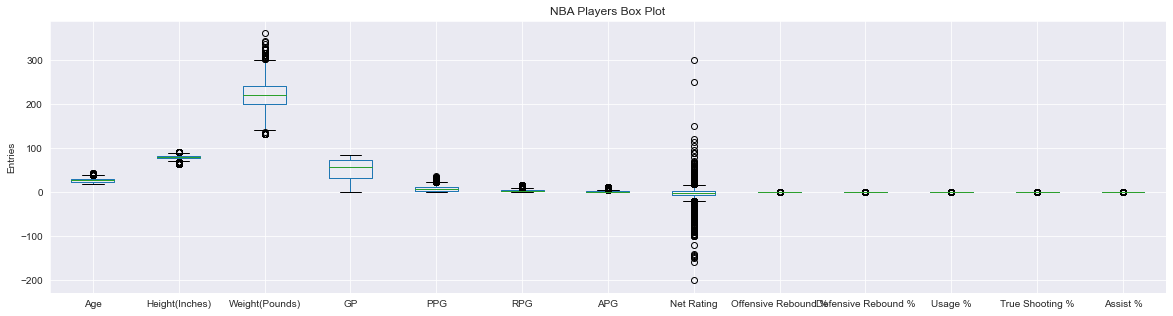

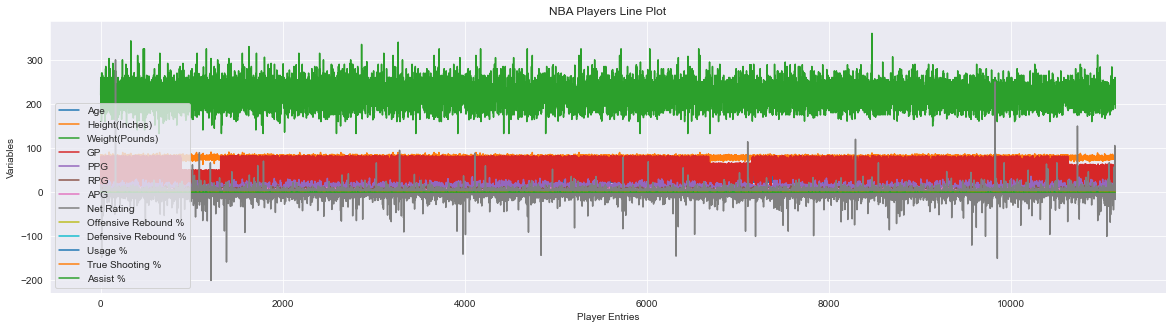

In [73]:
nbaplayers.plot(kind='box', title="NBA Players Box Plot",ylabel='Entries', xlabel='Variables') 
nbaplayers.plot(kind='line', title="NBA Players Line Plot", xlabel='Player Entries',ylabel='Variables') 
#Creating box and line plots to look at data set. 
#Net Rating, Height(Inches), and Weight(Pounds) have the larger IQR ranges.


In [74]:
#Net Rating has a high IQR range but it is an important variable that measures the performance of a player

In [75]:
Q1 = nbaplayers.quantile(0.25)
Q3 = nbaplayers.quantile(0.75)

IQR = Q3 - Q1

print(IQR) #Creating Quartiles

Age                     6.000
Height(Inches)          5.000
Weight(Pounds)         41.000
GP                     42.000
PPG                     8.000
RPG                     2.900
APG                     1.800
Net Rating              9.500
Offensive Rebound %     0.064
Defensive Rebound %     0.086
Usage %                 0.068
True Shooting %         0.079
Assist %                0.113
dtype: float64


<ipython-input-76-aa5164c15e9a>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  nbaheatmap = sns.heatmap(corrdata, annot=True).set(Title='NBA Players Correlation Matrix')


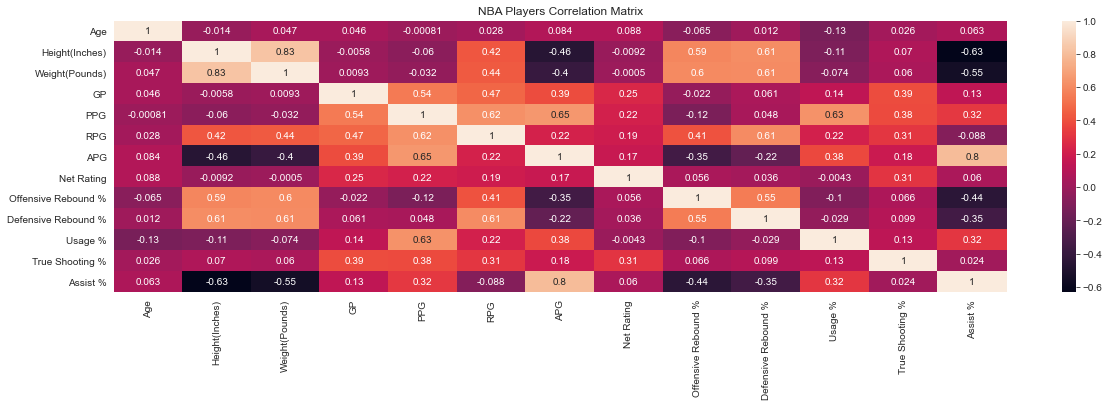

In [76]:
corrdata = nbaplayers.corr()

nbaheatmap = sns.heatmap(corrdata, annot=True).set(Title='NBA Players Correlation Matrix')

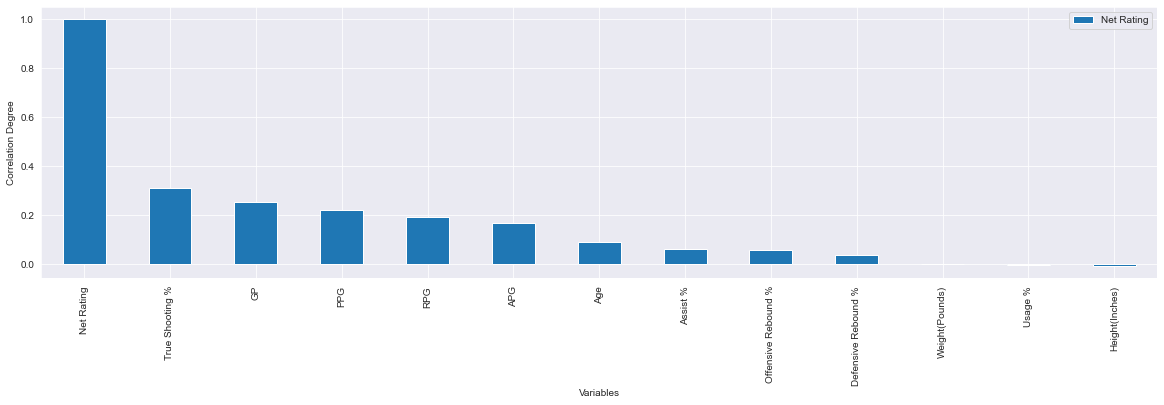

In [77]:
corrdatasort = corrdata.sort_values('Net Rating', ascending = False)

corrdatasort[['Net Rating']].plot(kind='bar', xlabel='Variables', ylabel='Correlation Degree')

plt.show() #Plotting the variables associated with age in descending order

In [78]:
#This chart shows that True Shooting %, GP, PPG, RPG, and APG are most correlated with net rating

In [79]:
nbaplayers['sval'] = nbaplayers['True Shooting %'] + nbaplayers['GP'] + nbaplayers['PPG'] + nbaplayers['RPG'] + nbaplayers['APG']
#sval which stands for Stephen's value, is a statistic that sums up the variables that are most correlated with net rating
#sval sums up True Shooting $, GP, PPG, RPG, and APG
#This variable also takes game statistics into account and games played(GP) which puts an emphasis on durability

In [80]:
print(nbaplayers['sval']) #inspecting sval values

0        80.379
1        19.530
2        11.576
3        70.999
4        32.611
          ...  
11140    79.205
11141    17.080
11142    61.940
11143    26.021
11144    38.063
Name: sval, Length: 11145, dtype: float64


In [81]:
svalmean = nbaplayers['sval'].mean()
print(svalmean)
#Inspecting the average sval value which will be used to identify when a player starts declining

66.00191718259349


In [82]:
meanx = nbaplayers['sval'].mean() #creating a mean variable to refernce
print(meanx)

66.00191718259349


In [83]:
nbaplayers['Is Declining ?'] = nbaplayers['sval'].apply(lambda x: 1 if x > meanx else 0)
# Apply a lambda function to loop through the dataset and populate a variable that indicates is a players sval is above average

In [84]:
print(nbaplayers.head())

              Player Team  Age  Height(Inches)  Weight(Pounds)  \
0      Dennis Rodman  CHI   36            78.0           220.0   
1  Dwayne Schintzius  LAC   28            85.0           260.0   
2       Earl Cureton  TOR   39            81.0           210.0   
3        Ed O'Bannon  DAL   24            80.0           222.0   
4        Ed Pinckney  MIA   34            81.0           240.0   

                       College Country Draft Year Draft Round Draft Number  \
0  Southeastern Oklahoma State     USA       1986           2           27   
1                      Florida     USA       1990           1           24   
2                Detroit Mercy     USA       1979           3           58   
3                         UCLA     USA       1995           1            9   
4                    Villanova     USA       1985           1           10   

   ...  APG  Net Rating  Offensive Rebound %  Defensive Rebound %  Usage %  \
0  ...  3.1        16.1                0.186            

In [85]:
declinesort = nbaplayers.sort_values(['Player', 'Season']) #sorting the dataset by player and season

In [86]:
print(declinesort.head())

          Player Team  Age  Height(Inches)  Weight(Pounds)       College  \
138   A.C. Green  DAL   33            81.0           225.0  Oregon State   
800   A.C. Green  DAL   34            81.0           225.0  Oregon State   
1054  A.C. Green  DAL   35            81.0           225.0  Oregon State   
1319  A.C. Green  LAL   36            81.0           225.0  Oregon State   
1948  A.C. Green  MIA   37            81.0           225.0  Oregon State   

     Country Draft Year Draft Round Draft Number  ...  APG  Net Rating  \
138      USA       1985           1           23  ...  0.8        -8.0   
800      USA       1985           1           23  ...  1.5        -7.2   
1054     USA       1985           1           23  ...  0.5        -5.6   
1319     USA       1985           1           23  ...  1.0         8.1   
1948     USA       1985           1           23  ...  0.5         3.3   

      Offensive Rebound %  Defensive Rebound %  Usage %  True Shooting %  \
138                 0.

In [87]:
numbernbaplayers = nbaplayers['Player'].value_counts()
print(numbernbaplayers)
#The is the number seasons that a player played in the NBA

Vince Carter     22
Dirk Nowitzki    21
Kevin Garnett    20
Kobe Bryant      20
Paul Pierce      19
                 ..
Thomas Welsh      1
Nate Driggers     1
Chris King        1
Sheldon Mac       1
Renaldo Major     1
Name: Player, Length: 2235, dtype: int64


In [88]:
numbernbaplayersavg = nbaplayers['Player'].value_counts().mean()
print(numbernbaplayersavg)
#The average player in the dataset players about five seasons in the NBA

4.9865771812080535


<AxesSubplot:>

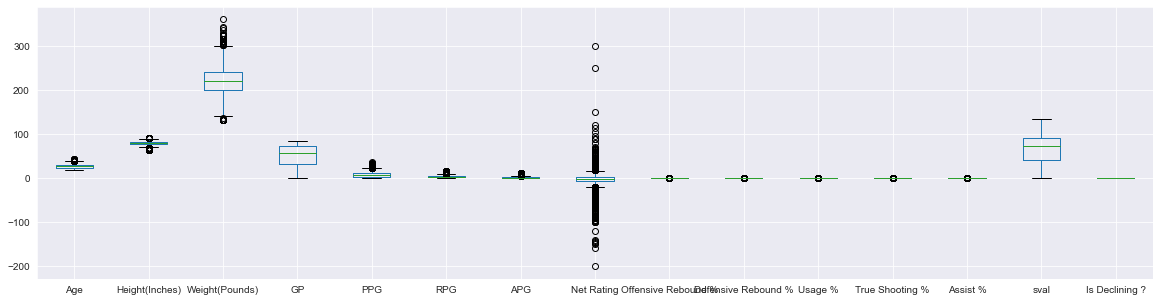

In [89]:
nbaplayers.plot(kind='box')
#Inspecting the IQR of sval and can see that it is large

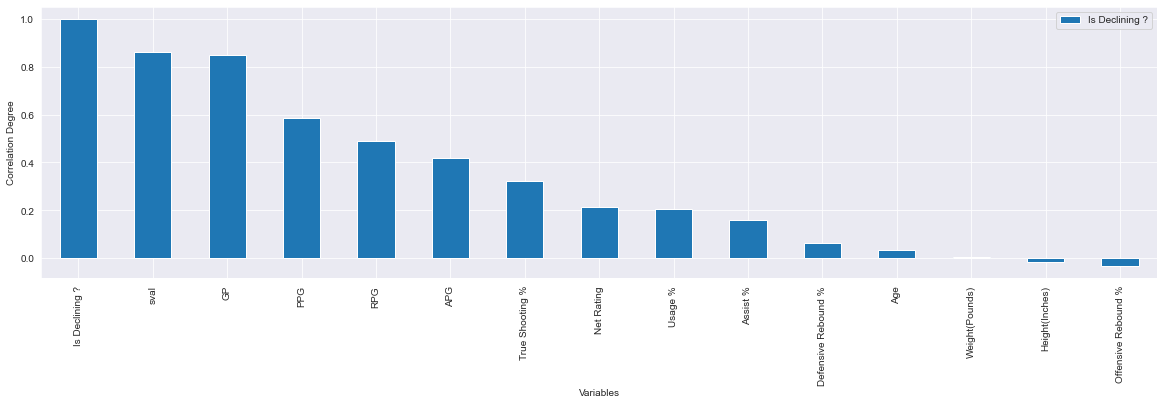

In [90]:
corrdata = nbaplayers.corr()

corrdatasort = corrdata.sort_values('Is Declining ?', ascending = False)

corrdatasort[['Is Declining ?']].plot(kind='bar', xlabel='Variables', ylabel='Correlation Degree')

plt.show() #Plotting the correlation with Is Declining ? The relationship with sval is shown

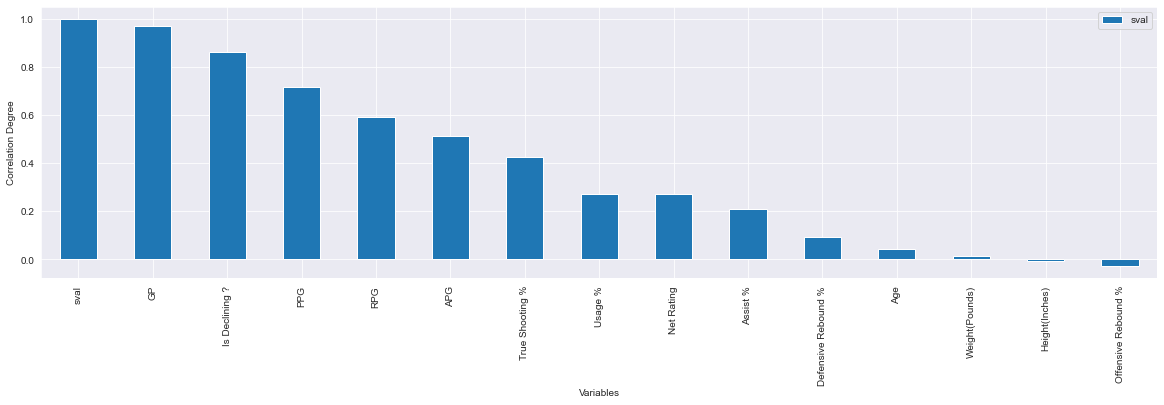

In [91]:
corrdata = nbaplayers.corr()

corrdatasort = corrdata.sort_values('sval', ascending = False)

corrdatasort[['sval']].plot(kind='bar', xlabel='Variables', ylabel='Correlation Degree')

plt.show() #Plotting correlation with sval. Sval is highly correlated with the variables in it's equation

In [92]:
dependent = nbaplayers['sval']
independent = nbaplayers.iloc[:,10:20]
independent = sm.add_constant(independent)
regression_model = sm.OLS(dependent,independent).fit()

print(regression_model.summary())
#Running linear regression to measure sval with other variables
#Tge high correlations for sval are expected since it is a calculation of the other variables

                            OLS Regression Results                            
Dep. Variable:                   sval   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.079e+32
Date:                Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:46:12   Log-Likelihood:             3.2830e+05
No. Observations:               11145   AIC:                        -6.566e+05
Df Residuals:                   11134   BIC:                        -6.565e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -8.882e-15   2

In [93]:
dependent = nbaplayers['Is Declining ?']
independent = nbaplayers.iloc[:,10:20]
independent = sm.add_constant(independent)
regression_model = sm.OLS(dependent,independent).fit()

print(regression_model.summary())
#Running linear regression to measure Is Declining ? with other variables

                            OLS Regression Results                            
Dep. Variable:         Is Declining ?   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     3254.
Date:                Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:46:13   Log-Likelihood:                -386.02
No. Observations:               11145   AIC:                             794.0
Df Residuals:                   11134   BIC:                             874.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2248    

In [94]:
nbaplayersmorethanfive = numbernbaplayers > numbernbaplayersavg
print(nbaplayersmorethanfive.sum())
#Of the 2235 players in the dataset, 920 played five seasons or more in the NBA

920


In [95]:
nbaplayers['Five Seasons Plus'] = numbernbaplayers.apply(lambda x: 1 if x > numbernbaplayersavg else 0)

In [96]:
print(nbaplayers.head()) #Could not populate 

              Player Team  Age  Height(Inches)  Weight(Pounds)  \
0      Dennis Rodman  CHI   36            78.0           220.0   
1  Dwayne Schintzius  LAC   28            85.0           260.0   
2       Earl Cureton  TOR   39            81.0           210.0   
3        Ed O'Bannon  DAL   24            80.0           222.0   
4        Ed Pinckney  MIA   34            81.0           240.0   

                       College Country Draft Year Draft Round Draft Number  \
0  Southeastern Oklahoma State     USA       1986           2           27   
1                      Florida     USA       1990           1           24   
2                Detroit Mercy     USA       1979           3           58   
3                         UCLA     USA       1995           1            9   
4                    Villanova     USA       1985           1           10   

   ...  Net Rating  Offensive Rebound %  Defensive Rebound %  Usage %  \
0  ...        16.1                0.186                0.323 

In [97]:
print(type(numbernbaplayers))

<class 'pandas.core.series.Series'>


In [98]:

nbaplayers['fiveplus'] = nbaplayers['Player'].map(nbaplayers['Player'].value_counts())
print(nbaplayers.head())
#Creating a variable that indicates if a player played more than five seasons initially

              Player Team  Age  Height(Inches)  Weight(Pounds)  \
0      Dennis Rodman  CHI   36            78.0           220.0   
1  Dwayne Schintzius  LAC   28            85.0           260.0   
2       Earl Cureton  TOR   39            81.0           210.0   
3        Ed O'Bannon  DAL   24            80.0           222.0   
4        Ed Pinckney  MIA   34            81.0           240.0   

                       College Country Draft Year Draft Round Draft Number  \
0  Southeastern Oklahoma State     USA       1986           2           27   
1                      Florida     USA       1990           1           24   
2                Detroit Mercy     USA       1979           3           58   
3                         UCLA     USA       1995           1            9   
4                    Villanova     USA       1985           1           10   

   ...  Offensive Rebound %  Defensive Rebound %  Usage %  True Shooting %  \
0  ...                0.186                0.323    0.10

In [99]:
nbaplayers['Five Seasons Plus'] = nbaplayers['fiveplus'].apply(lambda x: 1 if x > numbernbaplayersavg else 0)
print(nbaplayers['Five Seasons Plus'].value_counts())

1    8413
0    2732
Name: Five Seasons Plus, dtype: int64


In [100]:
#The Five Seasons plus variable is used to filter out the players who played less than 5 seasons in the NBA

In [101]:
condition1 = nbaplayers['Five Seasons Plus'] == 1
fiveseasonsplayersfilter = nbaplayers[condition1]
print(fiveseasonsplayersfilter.head())
#Creating a filtered dataframe with only the players who played five plus seasons

               Player Team  Age  Height(Inches)  Weight(Pounds)  \
6         Eddie Jones  LAL   25            78.0           190.0   
7      Elden Campbell  LAL   28            84.0           250.0   
8   Eldridge Recasner  ATL   29            76.0           190.0   
9        Elliot Perry  MIL   28            72.0           160.0   
12      Emanual Davis  HOU   28            77.0           194.0   

           College Country Draft Year Draft Round Draft Number  ...  \
6           Temple     USA       1994           1           10  ...   
7          Clemson     USA       1990           1           27  ...   
8       Washington     USA       1992   Undrafted    Undrafted  ...   
9          Memphis     USA       1991           2           37  ...   
12  Delaware State     USA  Undrafted   Undrafted    Undrafted  ...   

    Offensive Rebound %  Defensive Rebound %  Usage %  True Shooting %  \
6                 0.035                0.091    0.209            0.559   
7                 0.09

<AxesSubplot:title={'center':'NBA Players 5 + Box Plot'}, ylabel='Entries'>

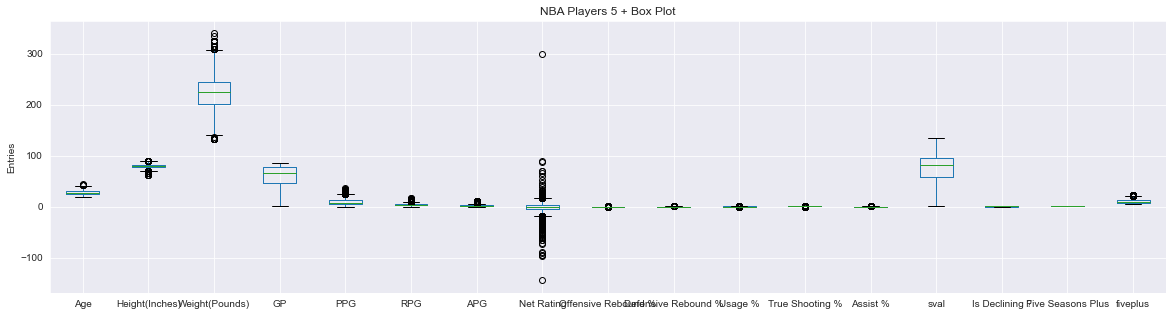

In [102]:
fiveseasonsplayersfilter.plot(kind='box', title="NBA Players 5 + Box Plot",ylabel='Entries', xlabel='Variables') 
#The IQRs for the filtered data frame are similar

In [103]:
print(fiveseasonsplayersfilter['Player'].value_counts())
#There are 920 players in this filtered dataframe

Vince Carter     22
Dirk Nowitzki    21
Kevin Garnett    20
Kobe Bryant      20
Paul Pierce      19
                 ..
Donald Sloan      5
Jeff Adrien       5
Leon Powe         5
Terry Rozier      5
Jahlil Okafor     5
Name: Player, Length: 920, dtype: int64


In [104]:
Q1F = fiveseasonsplayersfilter.quantile(0.25)
Q3F = fiveseasonsplayersfilter.quantile(0.75)
IQRF = Q3F - Q1F

print(IQRF)
#Inspecting the IQR from the filtered dataframe
#GP is a variable that is different among players and having a large IQR makes sense

Age                     7.000
Height(Inches)          5.000
Weight(Pounds)         43.000
GP                     31.000
PPG                     8.000
RPG                     3.100
APG                     2.100
Net Rating              8.700
Offensive Rebound %     0.064
Defensive Rebound %     0.087
Usage %                 0.068
True Shooting %         0.069
Assist %                0.117
sval                   37.701
Is Declining ?          1.000
Five Seasons Plus       0.000
fiveplus                5.000
dtype: float64


In [105]:
print(fiveseasonsplayersfilter['Is Declining ?'].value_counts())
#There are 2743 declining seasons in the filtered data frame

1    5670
0    2743
Name: Is Declining ?, dtype: int64


In [106]:
print(fiveseasonsplayersfilter['fiveplus'].mean())
#Of the players who played more than five seasons in the nba, they averaged 10 seasons

10.385474860335195


In [107]:
fiveseasonsplayersfiltersort = fiveseasonsplayersfilter.sort_values(['Player', 'Season'])
#grouping by player and season

In [108]:
print(fiveseasonsplayersfiltersort.head())

          Player Team  Age  Height(Inches)  Weight(Pounds)       College  \
138   A.C. Green  DAL   33            81.0           225.0  Oregon State   
800   A.C. Green  DAL   34            81.0           225.0  Oregon State   
1054  A.C. Green  DAL   35            81.0           225.0  Oregon State   
1319  A.C. Green  LAL   36            81.0           225.0  Oregon State   
1948  A.C. Green  MIA   37            81.0           225.0  Oregon State   

     Country Draft Year Draft Round Draft Number  ...  Offensive Rebound %  \
138      USA       1985           1           23  ...                0.100   
800      USA       1985           1           23  ...                0.090   
1054     USA       1985           1           23  ...                0.097   
1319     USA       1985           1           23  ...                0.089   
1948     USA       1985           1           23  ...                0.089   

      Defensive Rebound %  Usage %  True Shooting %  Assist %   Season  \


In [109]:
decliningplayercounts = fiveseasonsplayersfiltersort.groupby(['Player', 'Season', 'Is Declining ?'])

In [110]:
print(decliningplayercounts['sval'].describe())

                                           count    mean  std     min     25%  \
Player             Season  Is Declining ?                                       
A.C. Green         1996-97 1                 1.0  99.423  NaN  99.423  99.423   
                   1997-98 1                 1.0  99.396  NaN  99.396  99.396   
                   1998-99 0                 1.0  60.441  NaN  60.441  60.441   
                   1999-00 1                 1.0  94.382  NaN  94.382  94.382   
                   2000-01 1                 1.0  91.292  NaN  91.292  91.292   
...                                          ...     ...  ...     ...     ...   
Zydrunas Ilgauskas 2006-07 1                 1.0  99.727  NaN  99.727  99.727   
                   2007-08 1                 1.0  98.322  NaN  98.322  98.322   
                   2008-09 1                 1.0  86.923  NaN  86.923  86.923   
                   2009-10 1                 1.0  78.091  NaN  78.091  78.091   
                   2010-11 1

In [111]:
print(fiveseasonsplayersfiltersort['sval'].quantile(.33))

#33% of the seasons played by players who played over 5 seasons where below average

66.37392


In [114]:
nbaplayers.get_loc('PPG')

AttributeError: 'DataFrame' object has no attribute 'get_loc'

In [44]:
nbaplayers.to_csv('analyzedcapstone2.csv')
#exporting the analyzed file as a csv to place in Tableau for enhanced visualizations